### Ipython Notebook for plotting slow, med, fast spreading rates of Laurentia and Australia

In [23]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
from Utilities import poles_of_rotation, plotting_geometries, wrapping_polysomethings
%matplotlib inline

In [24]:
#load single rotation file for testing
rotation_model_slow = pygplates.RotationModel('/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Laurentia_Paleolong/Aus-Laurentia_800-AUSWUS_slow_spreading.rot')
rotation_model_normal = pygplates.RotationModel('/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Laurentia_Paleolong/Aus-Laurentia_800-AUSWUS.rot')
rotation_model_fast = pygplates.RotationModel('/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Laurentia_Paleolong/Aus-Laurentia_800-AUSWUS_fast_spreading.rot')

#set path to topologies
input_topology_filename_Gond = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Geometries_Gondwana_Laurentia_no_china_no_india.gpml'
input_topology_filename_Laur = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Geometries_Laurentia_Amazonia_WA.gpml'
input_flowlines_filename = '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Kinematic_tests/Flowlines/800_Flowlines_AUSWUS_10myr_interval.gpml'
topology_features_Gond = pygplates.FeatureCollection(input_topology_filename_Gond)
topology_features_Laur = pygplates.FeatureCollection(input_topology_filename_Laur)
flowline_features = pygplates.FeatureCollection(input_flowlines_filename)

#parameters
centre_longitude = 180
fixed_plate = 1001 #
moving_plate = 8004 #Australia (+Antarctica)
    
date_line_wrapper = pygplates.DateLineWrapper(180)

# Parameters required to define a flowline (as in GPlates)
left_plate = 8004
right_plate = 1001
to_time_zero = 0
delta_time_flowline = 10
reconstruction_time_flowline = 650
rifting_time=800

title_font_size = 55
ticks_font_size = 30
axis_font_size = 30
longs_lats_font_size = 30

CList_1 = 'r', 'o', 'g'
CList = ['#671934','#BE7C4D','#447604']

In [25]:
cb_times = np.arange(reconstruction_time_flowline,rifting_time+delta_time_flowline,delta_time_flowline) #for colorbar plotting

In [26]:
reconstructed_flowlines_slow = []
reconstructed_flowlines_normal = []
reconstructed_flowlines_fast = []
pygplates.reconstruct(flowline_features, rotation_model_slow, reconstructed_flowlines_slow, reconstruction_time_flowline, reconstruct_type=pygplates.ReconstructType.flowline)
pygplates.reconstruct(flowline_features, rotation_model_normal, reconstructed_flowlines_normal, reconstruction_time_flowline, reconstruct_type=pygplates.ReconstructType.flowline)
pygplates.reconstruct(flowline_features, rotation_model_fast, reconstructed_flowlines_fast, reconstruction_time_flowline, reconstruct_type=pygplates.ReconstructType.flowline)

0
1
2
0
1
2
0
1
2


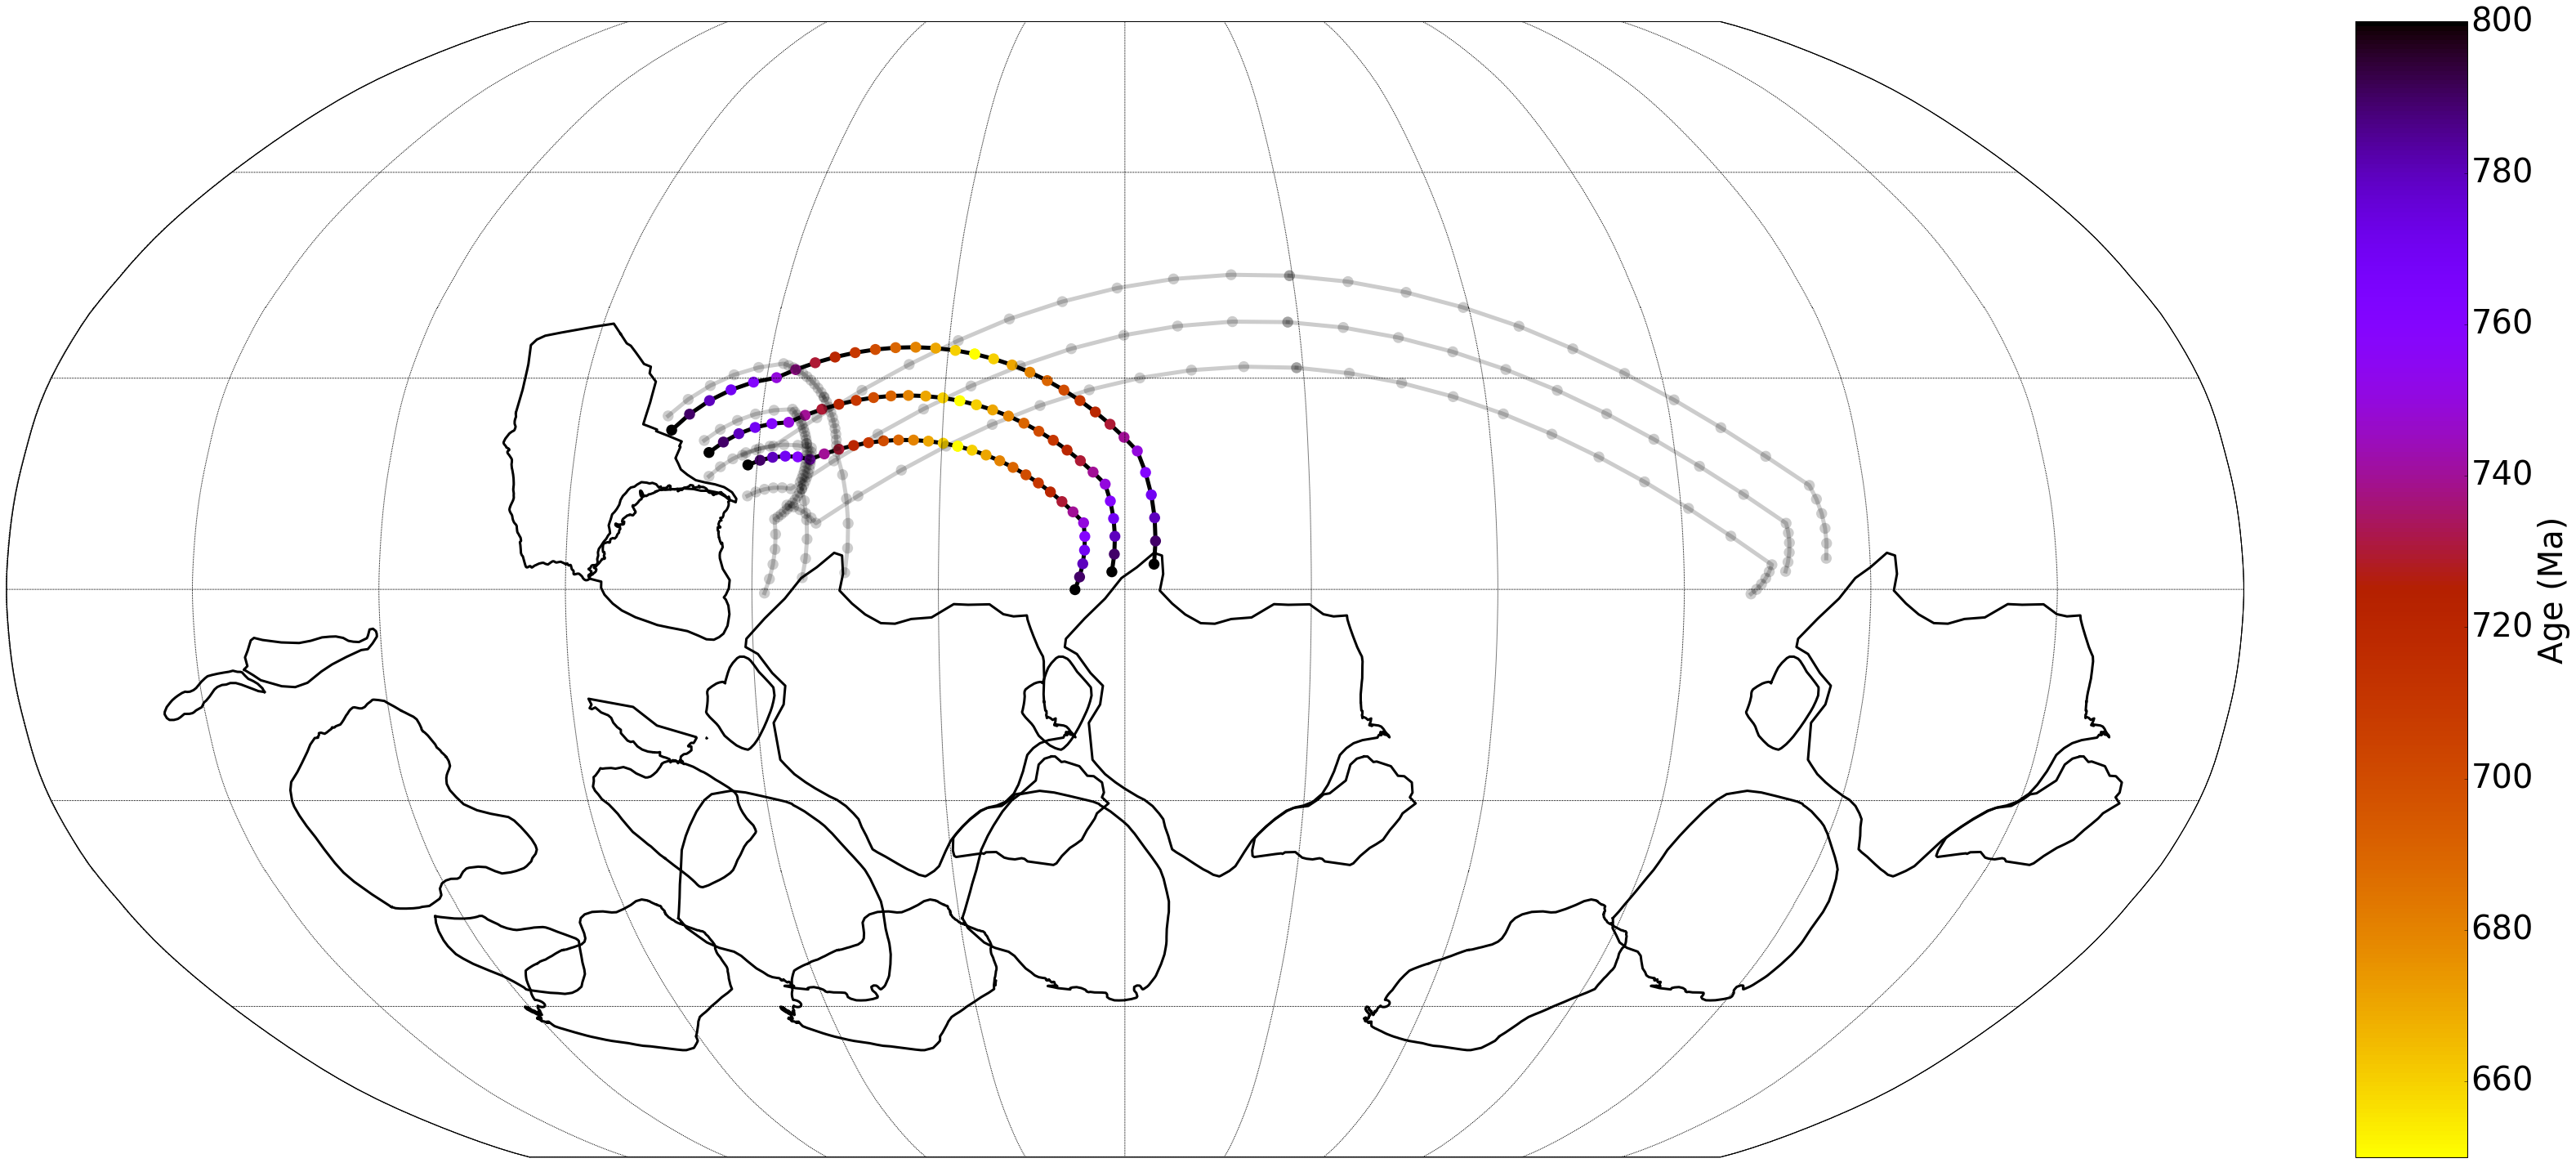

In [29]:
lats_650_n, longs_650_n, all_reconstructed_points_650_n = plotting_geometries(rotation_model_normal, topology_features_Gond, reconstruction_time_flowline, delta_time_flowline) #geometry positions      
lats_650_s, longs_650_s, all_reconstructed_points_650_s = plotting_geometries(rotation_model_slow, topology_features_Laur, reconstruction_time_flowline, delta_time_flowline) #geometry positions      
lats_650_f, longs_650_f, all_reconstructed_points_650_f = plotting_geometries(rotation_model_fast, topology_features_Laur, reconstruction_time_flowline, delta_time_flowline) #geometry positions      

fig = plt.figure(figsize=(36*1.5,24*1.5),dpi=300)
map_2 = Basemap(resolution='c',projection='robin',lon_0=180.)
map_2.drawmeridians(np.arange(0, 360, 30))#,labels=[0,0,0,1],fontsize=longs_lats_font_size)
map_2.drawparallels(np.arange(-90, 90, 30))#, labels=[1,0,0,0],fontsize=longs_lats_font_size)
clip_path = map_2.drawmapboundary(fill_color='white')

for i,j in zip(lats_650_n, longs_650_n):
    wrapped_points_lat, wrapped_points_lon = wrapping_polysomethings(i, j)

    x_geom,y_geom = map_2(wrapped_points_lon, wrapped_points_lat)
    map_2.plot(x_geom, y_geom, color='k', linewidth=3)

for i,j in zip(lats_650_s, longs_650_s):
    wrapped_points_lat, wrapped_points_lon = wrapping_polysomethings(i, j)

    x_geom,y_geom = map_2(wrapped_points_lon, wrapped_points_lat)
    map_2.plot(x_geom, y_geom, color='k', linewidth=3)

for i,j in zip(lats_650_f, longs_650_f):
    wrapped_points_lat, wrapped_points_lon = wrapping_polysomethings(i, j)

    x_geom,y_geom = map_2(wrapped_points_lon, wrapped_points_lat)
    map_2.plot(x_geom, y_geom, color='k', linewidth=3)

count = 0
for reconstructed_flowline in reconstructed_flowlines_normal:
    flowlinearray_left = np.empty([0,0])
    flowlinearray_right = np.empty([0,0])
    for left_point in reconstructed_flowline.get_left_flowline():
        flowlinearray_left = np.append(flowlinearray_left, left_point.to_lat_lon_array())
    for right_point in reconstructed_flowline.get_right_flowline():
        flowlinearray_right = np.append(flowlinearray_right, right_point.to_lat_lon_array())

    x, y = map_2(flowlinearray_left[1::2],flowlinearray_left[::2])
    map_2.plot(x, y, c='k', clip_path=clip_path, lw=5, zorder=1)
    l3=map_2.scatter(x, y, 180, c=cb_times, cmap=plt.cm.gnuplot_r,edgecolor='none', clip_path=clip_path,vmin=650,vmax=800, zorder=2)

    x, y = map_2(flowlinearray_right[1::2],flowlinearray_right[::2])
    map_2.plot(x, y, c='k', clip_path=clip_path, lw=5, zorder=1)
    l3=map_2.scatter(x, y, 180, c=cb_times,cmap=plt.cm.gnuplot_r, edgecolor='none', clip_path=clip_path,vmin=650,vmax=800, zorder=2)

    print count
    count = count+1

count = 0
for reconstructed_flowline in reconstructed_flowlines_slow:
    flowlinearray_left = np.empty([0,0])
    flowlinearray_right = np.empty([0,0])
    for left_point in reconstructed_flowline.get_left_flowline():
        flowlinearray_left = np.append(flowlinearray_left, left_point.to_lat_lon_array())
    for right_point in reconstructed_flowline.get_right_flowline():
        flowlinearray_right = np.append(flowlinearray_right, right_point.to_lat_lon_array())

    x, y = map_2(flowlinearray_left[1::2],flowlinearray_left[::2])
    map_2.plot(x, y, c='k', clip_path=clip_path, lw=5, zorder=1, alpha=0.2)
    l4=map_2.scatter(x, y, 180, c='k', cmap=plt.cm.gnuplot_r,edgecolor='none', clip_path=clip_path,vmin=650,vmax=800, zorder=2, alpha=0.2)

    x, y = map_2(flowlinearray_right[1::2],flowlinearray_right[::2])
    map_2.plot(x, y, c='k', clip_path=clip_path, lw=5, zorder=1, alpha=0.2)
    l4=map_2.scatter(x, y, 180, c='k',cmap=plt.cm.gnuplot_r, edgecolor='none', clip_path=clip_path,vmin=650,vmax=800, zorder=2, alpha=0.2)

    print count
    count = count+1
    
count = 0
for reconstructed_flowline in reconstructed_flowlines_fast:
    flowlinearray_left = np.empty([0,0])
    flowlinearray_right = np.empty([0,0])
    for left_point in reconstructed_flowline.get_left_flowline():
        flowlinearray_left = np.append(flowlinearray_left, left_point.to_lat_lon_array())
    for right_point in reconstructed_flowline.get_right_flowline():
        flowlinearray_right = np.append(flowlinearray_right, right_point.to_lat_lon_array())

    x, y = map_2(flowlinearray_left[1::2],flowlinearray_left[::2])
    map_2.plot(x, y, c='k', clip_path=clip_path, lw=5, zorder=1, alpha=0.2)
    l4=map_2.scatter(x, y, 180, c='k', cmap=plt.cm.gnuplot_r,edgecolor='none', clip_path=clip_path,vmin=650,vmax=800, zorder=2, alpha=0.2)

    x, y = map_2(flowlinearray_right[1::2],flowlinearray_right[::2])
    map_2.plot(x, y, c='k', clip_path=clip_path, lw=5, zorder=1, alpha=0.2)
    l4=map_2.scatter(x, y, 180, c='k',cmap=plt.cm.gnuplot_r, edgecolor='none', clip_path=clip_path,vmin=650,vmax=800, zorder=2, alpha=0.2)

    print count
    count = count+1

    
#plt.title('Laurentia longitude at ' +str(reconstruction_time_flowline) + ' Ma', fontsize=title_font_size, y=1.08)
cbar = map_2.colorbar(l3,location='right',pad="5%")
cbar.ax.tick_params(labelsize=40)
cbar.set_label('Age (Ma)',fontsize=40)

fname = 'new Laurentia longitude at ' +str(rifting_time) + 'Ma.pdf'
fig.savefig(fname,bbox_inches='tight', dpi=300)

In [28]:
#generation of distances based on slow (20 mm/yr), medium (70 mm/yr), fast (120 mm/yr) spreading
sfs = (20, 70, 120)
Rifting_time = np.arange(800,700,-25)
End_time = 650

size = [] #Rifting Time1/slow, Rifting Time1/med, Rifting Time1/fast; Rifting Time2/slow etc.
for i in Rifting_time:
    for j in sfs:
        ocean_size = j*(i-End_time)
        size.append(ocean_size)

#Rifting Time1/slow, Rifting Time1/med, Rifting Time1/fast; Rifting Time2/slow etc.
size

[3000, 10500, 18000, 2500, 8750, 15000, 2000, 7000, 12000, 1500, 5250, 9000]